In [34]:
print(__doc__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import glob
import os
pd.options.display.float_format = "{:.4f}".format
pd.set_option("display.max_rows", None, "display.max_columns", None)

Automatically created module for IPython interactive environment


In [35]:
def boxplot(x, y, ax, theme = 'b', whis = 1.5):

    xlimits = [np.percentile(x, q) for q in (25, 50, 75)]
    ylimits = [np.percentile(y, q) for q in (25, 50, 75)]
    ##the box
    box = Rectangle(
        (xlimits[0],ylimits[0]),
        (xlimits[2]-xlimits[0]),
        (ylimits[2]-ylimits[0]),
        facecolor = theme, alpha = 0.3, edgecolor = theme, lw = 0.5, zorder=0)
    ax.add_patch(box)
    ##the x median
    vline = Line2D(
        [xlimits[1],xlimits[1]],[ylimits[0],ylimits[2]],
        color=theme, lw = 0.5, zorder=1)
    ax.add_line(vline)
    ##the y median
    hline = Line2D(
        [xlimits[0],xlimits[2]],[ylimits[1],ylimits[1]],
        color=theme, lw = 0.5, zorder=1)
    ax.add_line(hline)
    ##the central point
    ax.plot([xlimits[1]],[ylimits[1]], color='0.3', marker='o')

    ##the x-whisker
    iqr = xlimits[2]-xlimits[0]

    ##left
    left = np.min(np.array(x)[x > xlimits[0]-whis*iqr])
    whisker_line = Line2D(
        [left, xlimits[0]], [ylimits[1],ylimits[1]],
        color = theme, lw = 0.5, zorder = 1)
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [left, left], [ylimits[0],ylimits[2]],
        color = theme, lw = 0.5, zorder = 1 )
    ax.add_line(whisker_bar)
    ##right
    right = np.max(np.array(x)[x < xlimits[2]+whis*iqr])
    whisker_line = Line2D(
        [right, xlimits[2]], [ylimits[1],ylimits[1]],
        color = theme, lw = 0.5, zorder = 1)
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [right, right], [ylimits[0],ylimits[2]],
        color = theme, lw = 0.5, zorder = 1 )
    ax.add_line(whisker_bar)
    ##the y-whisker
    iqr = ylimits[2]-ylimits[0]
    ##bottom
    bottom = np.min(np.array(y)[y > ylimits[0]-whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [bottom, ylimits[0]], 
        color = theme, lw = 0.5, zorder = 1)
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [xlimits[0],xlimits[2]], [bottom, bottom], 
        color = theme, lw = 0.5, zorder = 1 )
    ax.add_line(whisker_bar)
    ##top
    top = np.max(np.array(y)[y < ylimits[2]+whis*iqr])
    whisker_line = Line2D(
        [xlimits[1],xlimits[1]], [top, ylimits[2]], 
        color = theme, lw = 0.5, zorder = 1)
    ax.add_line(whisker_line)
    whisker_bar = Line2D(
        [xlimits[0],xlimits[2]], [top, top], 
        color = theme, lw = 0.5, zorder = 1)
    ax.add_line(whisker_bar)
    ##outliers
    mask = (x<left)|(x>right)|(y<bottom)|(y>top)
    ax.scatter(
        np.array(x)[mask],np.array(y)[mask],lw = 0.5,
        facecolors='none', edgecolors=theme)

No handles with labels found to put in legend.


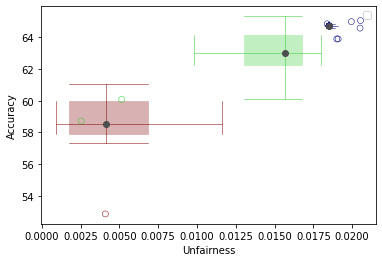

In [36]:
path = r'/Users/wenxuanhuang/Documents/Repo/Active-Learning-Performance-Benchmarking/result_log/af_test_max_corr/**/'
all_files = sorted(glob.glob(os.path.join(path, "1.result.csv")))

# print(all_files[0])

# min_abs = []
# idx_min_abs = []
# min_diff = []
# idx_min_diff = []
end_ur_fairness = []
end_ur_accuracies = []
end_rs_fairness = []
end_rs_accuracies = []
end_nonal_fairness = []
end_nonal_accuracies = []

for f in all_files:
    df = pd.read_csv(f)
    df = df.rename(columns={"# x_axis": "axis", " ur_accuracies": "ur_accuracies", " ur_fairness": "ur_fairness", " rs_accuracies": "rs_accuracies", " rs_fairness": "rs_fairness", " nonal_accuracies": "nonal_accuracies", " nonal_fairness": "nonal_fairness"})
    # min_abs = np.append(min_abs, df['ur_fairness'].min())
    # # print(min_abs)
    # idx_min_abs = np.append(idx_min_abs, df['ur_fairness'].idxmin())
    # # print(idx_min_abs)
    # df_diff = df.diff()
    # min_diff = np.append(min_diff, df_diff['ur_fairness'].min())
    # # print(min_diff)
    # idx_min_diff = np.append(idx_min_diff, df_diff['ur_fairness'].idxmin())
    # # print(idx_min_diff)
    end_df = df.iloc[[-1]]
    end_ur_fairness = np.append(end_ur_fairness, end_df['ur_fairness'])
    end_ur_accuracies = np.append(end_ur_accuracies, end_df['ur_accuracies'])
    end_rs_fairness = np.append(end_rs_fairness, end_df['rs_fairness'])
    end_rs_accuracies = np.append(end_rs_accuracies, end_df['rs_accuracies'])
    end_nonal_fairness = np.append(end_nonal_fairness, end_df['nonal_fairness'])
    end_nonal_accuracies = np.append(end_nonal_accuracies, end_df['nonal_accuracies'])

# print(end_nonal_fairness)
fig, ax = plt.subplots()
boxplot(end_ur_fairness, end_ur_accuracies, ax, 'maroon', whis=1.5)
boxplot(end_rs_fairness, end_rs_accuracies, ax, 'limegreen', whis=1.5)
boxplot(end_nonal_fairness, end_nonal_accuracies, ax, 'navy', whis=1.5)
plt.legend()
plt.xlabel('Unfairness')
plt.ylabel('Accuracy')
plt.show()

# df_overview = pd.DataFrame(np.hstack((min_abs[:,None], idx_min_abs[:,None], min_diff[:,None], idx_min_diff[:,None])))

# print(df_overview)
# candidate_size = int(round(len(df_overview)/2))
# idx_diff = abs(df_overview[1]-df_overview[3])
# idx_sort = idx_diff.argsort()  
# idx_min_diff_top = df_overview.nsmallest(candidate_size, 2, keep='all').index  # index of 5 largest fairness reduction

# print(idx_diff, idx_sort, idx_min_diff_top)

# ideal_trade_off = []
# ideal_budget = []

# for idx in idx_sort[0:candidate_size]:  # top half with smallest drop index and min index difference
#     if idx in idx_min_diff_top.unique():  # is it one of the largest impact on fairness reduction
#         df_min = pd.read_csv(all_files[idx])
#         df_min = df_min.rename(columns={"# x_axis": "axis", " ur_accuracies": "ur_accuracies", " ur_fairness": "ur_fairness", " rs_accuracies": "rs_accuracies", " rs_fairness": "rs_fairness", " nonal_accuracies": "nonal_accuracies", " nonal_fairness": "nonal_fairness"})
#         # print(idx)
#         if df_min['ur_fairness'].min()-df_min['rs_fairness'].min()<0:
#             # print(df_min)
#             e_trade_off = idx/10
#             ideal_trade_off = np.append(ideal_trade_off, e_trade_off)
#             ideal_budget = np.append(ideal_budget, df_min['axis'][df_min['ur_fairness'].idxmin()])

# print(ideal_trade_off, ideal_budget)